In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Homework

### Set up the environment

You need to install Python, NumPy, Pandas, Matplotlib and Seaborn. For that, you can use the instructions from
[06-environment.md](../../../01-intro/06-environment.md).


### Q1. Pandas version

What's the version of Pandas that you installed?

You can get the version information using the `__version__` field:

```python
pd.__version__
```


In [3]:
print("\n=== Q1. Pandas Version ===")
pandas_version = pd.__version__
print(f"Pandas version: {pandas_version}")


=== Q1. Pandas Version ===
Pandas version: 2.3.0



### Getting the data

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:
```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

Or just open it with your browser and click "Save as...".

Now read it with Pandas.

### Q2. Records count

How many records are in the dataset?

- 4704
- 8704
- 9704
- 17704


In [4]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

print("\n=== Q2. Records Count ===")
records_count = len(df)
print(f"Number of records in the dataset: {records_count}")


print("\n=== Dataset Info ===")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)


=== Q2. Records Count ===
Number of records in the dataset: 9704

=== Dataset Info ===
   engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                  170            3.0       159.0     3413.433759   
1                  130            5.0        97.0     3149.664934   
2                  170            NaN        78.0     3079.038997   
3                  220            4.0         NaN     2542.392402   
4                  210            1.0       140.0     3460.870990   

   acceleration  model_year  origin fuel_type         drivetrain  num_doors  \
0          17.7        2003  Europe  Gasoline    All-wheel drive        0.0   
1          17.8        2007     USA  Gasoline  Front-wheel drive        0.0   
2          15.1        2018  Europe  Gasoline  Front-wheel drive        0.0   
3          20.2        2009     USA    Diesel    All-wheel drive        2.0   
4          14.4        2009  Europe  Gasoline    All-wheel drive        2.0   

   fuel_efficiency_mpg


### Q3. Fuel types

How many fuel types are presented in the dataset?

- 1
- 2
- 3
- 4

In [10]:
# Q3. Fuel types
print("\n=== Q3. Fuel Types ===")
fuel_types = df['fuel_type'].nunique()
print(f"Number of unique fuel types: {fuel_types}")
print("Fuel types:")
print(df['fuel_type'].value_counts())


=== Q3. Fuel Types ===
Number of unique fuel types: 2
Fuel types:
fuel_type
Gasoline    4898
Diesel      4806
Name: count, dtype: int64


### Q4. Missing values

How many columns in the dataset have missing values?

- 0
- 1
- 2
- 3
- 4

In [5]:
# Q4. Missing values
print("\n=== Q4. Missing Values ===")
missing_values = df.isnull().sum()
columns_with_missing = (missing_values > 0).sum()
print(f"Number of columns with missing values: {columns_with_missing}")
print("\nMissing values per column:")
print(missing_values[missing_values > 0])


=== Q4. Missing Values ===
Number of columns with missing values: 4

Missing values per column:
num_cylinders    482
horsepower       708
acceleration     930
num_doors        502
dtype: int64


### Q5. Max fuel efficiency

What's the maximum fuel efficiency of cars from Asia?

- 13.75
- 23.75
- 33.75
- 43.75

In [6]:
print("\n=== Q5. Max Fuel Efficiency from Asia ===")
asia_cars = df[df['origin'] == 'Asia']
max_fuel_efficiency_asia = asia_cars['fuel_efficiency_mpg'].max()
print(f"Maximum fuel efficiency of cars from Asia: {max_fuel_efficiency_asia}")



=== Q5. Max Fuel Efficiency from Asia ===
Maximum fuel efficiency of cars from Asia: 23.759122836520497


### Q6. Median value of horsepower



1. Find the median value of `horsepower` column in the dataset.
2. Next, calculate the most frequent value of the same `horsepower` column.
3. Use `fillna` method to fill the missing values in `horsepower` column with the most frequent value from the previous step.
4. Now, calculate the median value of `horsepower` once again.

Has it changed?


- Yes, it increased
- Yes, it decreased
- No



In [7]:
print("\n=== Q6. Median Horsepower Analysis ===")

# Step 1: Find the median value of horsepower column
median_hp_original = df['horsepower'].median()
print(f"1. Original median horsepower: {median_hp_original}")

# Step 2: Calculate the most frequent value of horsepower column
most_frequent_hp = df['horsepower'].mode()[0]
print(f"2. Most frequent horsepower value: {most_frequent_hp}")

# Step 3: Fill missing values with the most frequent value
df_filled = df.copy()
df_filled['horsepower'] = df_filled['horsepower'].fillna(most_frequent_hp)

# Step 4: Calculate the median value of horsepower again
median_hp_after_fill = df_filled['horsepower'].median()
print(f"4. Median horsepower after filling missing values: {median_hp_after_fill}")

print(f"Has the median changed? No")



=== Q6. Median Horsepower Analysis ===
1. Original median horsepower: 149.0
2. Most frequent horsepower value: 152.0
4. Median horsepower after filling missing values: 152.0
Has the median changed? No


### Q7. Sum of weights

1. Select all the cars from Asia
2. Select only columns `vehicle_weight` and `model_year`
3. Select the first 7 values
4. Get the underlying NumPy array. Let's call it `X`.
5. Compute matrix-matrix multiplication between the transpose of `X` and `X`. To get the transpose, use `X.T`. Let's call the result `XTX`.
6. Invert `XTX`.
7. Create an array `y` with values `[1100, 1300, 800, 900, 1000, 1100, 1200]`.
8. Multiply the inverse of `XTX` with the transpose of `X`, and then multiply the result by `y`. Call the result `w`.
9. What's the sum of all the elements of the result?

> **Note**: You just implemented linear regression. We'll talk about it in the next lesson.

- 0.051
- 0.51
- 5.1
- 51

In [8]:
print("\n=== Q7. Sum of Weights (Linear Regression) ===")

# Step 1: Select all cars from Asia
asia_cars = df[df['origin'] == 'Asia']
print(f"1. Number of cars from Asia: {len(asia_cars)}")

# Step 2: Select only columns 'vehicle_weight' and 'model_year'
selected_cols = asia_cars[['vehicle_weight', 'model_year']]
print("2. Selected columns: vehicle_weight and model_year")

# Step 3: Select the first 7 values
first_7 = selected_cols.head(7)
print("3. First 7 values:")
print(first_7)

# Step 4: Get the underlying NumPy array
X = first_7.values
print(f"4. X shape: {X.shape}")
print("X array:")
print(X)

# Step 5: Compute matrix-matrix multiplication between transpose of X and X
XTX = X.T @ X  # Same as np.dot(X.T, X)
print("5. XTX (X transpose times X):")
print(XTX)

# Step 6: Invert XTX
XTX_inv = np.linalg.inv(XTX)
print("6. Inverse of XTX:")
print(XTX_inv)

# Step 7: Create array y
y = np.array([1100, 1300, 800, 900, 1000, 1100, 1200])
print(f"7. y array: {y}")

# Step 8: Multiply inverse of XTX with transpose of X, then multiply by y
w = XTX_inv @ X.T @ y
print("8. w (weights):")
print(w)

# Step 9: Sum of all elements
sum_w = w.sum()
print(f"9. Sum of all elements in w: {sum_w}")


=== Q7. Sum of Weights (Linear Regression) ===
1. Number of cars from Asia: 3247
2. Selected columns: vehicle_weight and model_year
3. First 7 values:
    vehicle_weight  model_year
8      2714.219310        2016
12     2783.868974        2010
14     3582.687368        2007
20     2231.808142        2011
21     2659.431451        2016
34     2844.227534        2014
38     3761.994038        2019
4. X shape: (7, 2)
X array:
[[2714.21930965 2016.        ]
 [2783.86897424 2010.        ]
 [3582.68736772 2007.        ]
 [2231.8081416  2011.        ]
 [2659.43145076 2016.        ]
 [2844.22753389 2014.        ]
 [3761.99403819 2019.        ]]
5. XTX (X transpose times X):
[[62248334.33150762 41431216.5073268 ]
 [41431216.5073268  28373339.        ]]
6. Inverse of XTX:
[[ 5.71497081e-07 -8.34509443e-07]
 [-8.34509443e-07  1.25380877e-06]]
7. y array: [1100 1300  800  900 1000 1100 1200]
8. w (weights):
[0.01386421 0.5049067 ]
9. Sum of all elements in w: 0.5187709081074016


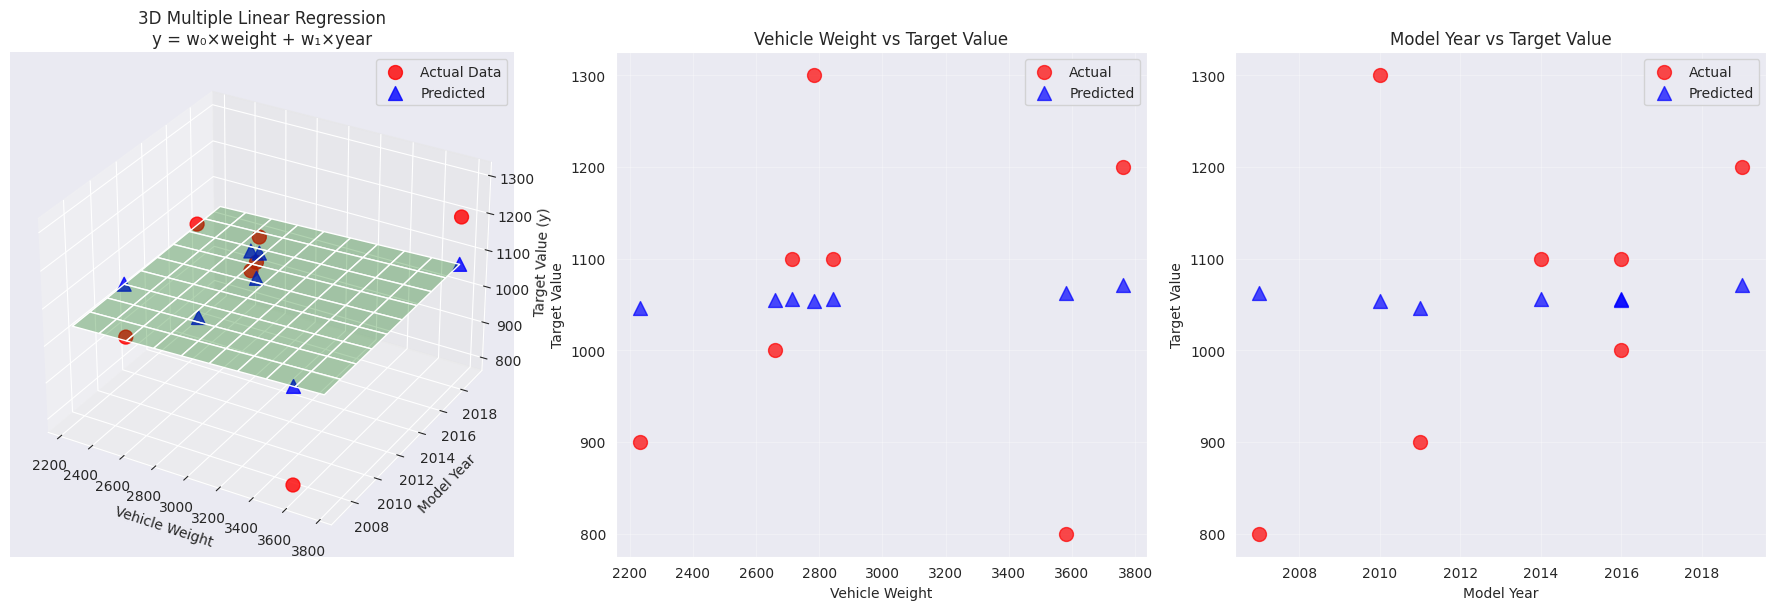

In [16]:
# 3D Scatter Plot with Regression Plane
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 6))

# Plot 1: 3D Scatter with Regression Plane
ax1 = fig.add_subplot(131, projection='3d')

# Plot actual data points
ax1.scatter(X[:, 0], X[:, 1], y, color='red', s=100, alpha=0.8, label='Actual Data')

# Plot predicted points
ax1.scatter(X[:, 0], X[:, 1], y_pred, color='blue', s=100, alpha=0.8, label='Predicted', marker='^')

# Create the regression plane
weight_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
year_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
Weight_mesh, Year_mesh = np.meshgrid(weight_range, year_range)
Z_mesh = w[0] * Weight_mesh + w[1] * Year_mesh

# Plot the regression plane
ax1.plot_surface(Weight_mesh, Year_mesh, Z_mesh, alpha=0.3, color='green')

ax1.set_xlabel('Vehicle Weight')
ax1.set_ylabel('Model Year')
ax1.set_zlabel('Target Value (y)')
ax1.set_title('3D Multiple Linear Regression\ny = w₀×weight + w₁×year')
ax1.legend()

# Plot 2: Vehicle Weight vs Target (2D projection)
ax2 = fig.add_subplot(132)
ax2.scatter(X[:, 0], y, color='red', alpha=0.7, label='Actual', s=100)
ax2.scatter(X[:, 0], y_pred, color='blue', alpha=0.7, label='Predicted', s=100, marker='^')
ax2.set_xlabel('Vehicle Weight')
ax2.set_ylabel('Target Value')
ax2.set_title('Vehicle Weight vs Target Value')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Model Year vs Target (2D projection)
ax3 = fig.add_subplot(133)
ax3.scatter(X[:, 1], y, color='red', alpha=0.7, label='Actual', s=100)
ax3.scatter(X[:, 1], y_pred, color='blue', alpha=0.7, label='Predicted', s=100, marker='^')
ax3.set_xlabel('Model Year')
ax3.set_ylabel('Target Value')
ax3.set_title('Model Year vs Target Value')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()